# Fashion Image Classification using Fashion MNIST

- Import Libraries
- Load the dataset from keras
- preprocessing
- Exploratory Data Analysis
- validation split
- Instantiate and Build model
- Complie the Model
- Fit Model
- Evaluate model
- make predictions
- Final Script

## Import Libraries

In [23]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import fashion_mnist

## Load the dataset from keras


In [3]:
# Load the dataset from keras
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


print(f"X_train: {X_train_full.shape}")
print(f"y_train: {y_train_full.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


## Preprocessing

In [4]:
# Split into Validation sets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Scale between 0 and 1
X_valid = X_valid / 255
X_train = X_train / 255


print(f"X_valid: {X_valid.shape}")
print(f"y_valid: {y_valid.shape}")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_valid: (5000, 28, 28)
y_valid: (5000,)
X_train: (55000, 28, 28)
y_train: (55000,)


## Exploratory Data Analysis

In [5]:
# list of class names in the datasets
class_names = [
    "T-shirt/top", 
    "Trouser", 
    "Pullover", 
    "Dress", 
    "Coat", 
    "Sandal", 
    "Shirt", 
    "Sneaker", 
    "Bag", 
    "Ankle boot"
]

# An Example of first training label
first_item = class_names[y_train[0]]
print(f"The equivalent item name for class label: '{y_train[0]} is '{first_item}'")
print(f"The total number of class labels are: {len(class_names)}")

The equivalent item name for class label: '4 is 'Coat'
The total number of class labels are: 10


## Instantiate and Build model

In [6]:
# Instantiate Model
model = Sequential()

# Add Layers to the model
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation= "softmax"))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model

In [18]:
# Compiling the model
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

## Training the Model

In [19]:
# Fitting the Model to the train and Validation datasets

history = model.fit(
    X_train,
        y_train,
        epochs= 30,
        validation_data= (X_valid, y_valid)
)
        

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9512 - loss: 0.1382 - val_accuracy: 0.8940 - val_loss: 0.3143
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9541 - loss: 0.1324 - val_accuracy: 0.8968 - val_loss: 0.2907
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9538 - loss: 0.1324 - val_accuracy: 0.8918 - val_loss: 0.3070
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9541 - loss: 0.1316 - val_accuracy: 0.8964 - val_loss: 0.2984
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9554 - loss: 0.1283 - val_accuracy: 0.8796 - val_loss: 0.3717
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9551 - loss: 0.1260 - val_accuracy: 0.8884 - val_loss: 0.3387
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9558 - loss: 0.1248 - val_accuracy: 0.9006 - val_loss: 0.2990
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9573 - loss: 0.1217 -

In [31]:
# # Save the Model
# model.save("fashion_mnist_model_2.h5")

# # load saved Model
# model = keras.models.load_model("fashion_mnist_model_2.h5")

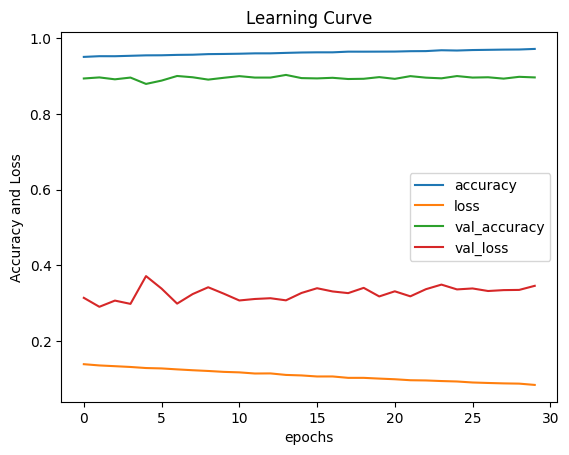

In [28]:
# Learning Curve 

pd.DataFrame(history.history).plot(
    title = "Learning Curve",
    xlabel = "epochs", 
    ylabel = "Accuracy and Loss"
);

## Evaluate model

In [36]:
# Evaluate model

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8474 - loss: 100.3262
Loss: 101.59877014160156
Accuracy: 0.8436999917030334


## Make Prediction

In [44]:
# Make Probability on Prediction
X_proba = model.predict(X_test[:3])

# Make Class Prediction
model.predict_classes(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


AttributeError: 'Sequential' object has no attribute 'predict_classes'